<a href="https://colab.research.google.com/github/kuanhoong/mlstudyjam/blob/main/week2/2022_08_20_MLStudyJam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Study Jam - Data Viz Made Easy Hands-On with Seaborn
Data Source: [Data Science Job Salaries](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style('whitegrid')

In [ ]:
gdrive_link = 'https://drive.google.com/file/d/1OpYxUxMLiqyMOhqMtcjJLMm84gpZv9qS/view?usp=sharing'

raw_csv = 'https://drive.google.com/uc?id=' + gdrive_link.split('/')[-2]
df = pd.read_csv(raw_csv).drop('Unnamed: 0', axis = 1)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [ ]:
for column in df.select_dtypes(include = ['object']):
  print(column, ':', df[column].unique(), '\n')

experience_level : ['MI' 'SE' 'EN' 'EX'] 

employment_type : ['FT' 'CT' 'PT' 'FL'] 

job_title : ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data

## A bit of pre-processing

In [ ]:
df['occupation'] = df['job_title'].map(lambda x: x.split(' ')[-1])
df.loc[df['job_title'].map(lambda x: 'Lead' in x), 'occupation'] = 'Leader'
df.loc[df['job_title'].map(lambda x: 'Head' in x), 'occupation'] = 'Leader'
df.loc[df['job_title'].map(lambda x: 'Specialist' in x), 'occupation'] = 'Leader'
df.loc[df['job_title'].map(lambda x: 'Director' in x), 'occupation'] = 'Leader'

num_job = df.job_title.nunique()
num_occupation = df.occupation.nunique()

print(f'the number of job: {num_job}')
print(f"the number of occupations: {num_occupation}")
print()
pd.DataFrame(df['occupation'].value_counts())

the number of job: 50
the number of occupations: 9



,occupation
Engineer,216
Scientist,191
Analyst,116
Leader,34
Manager,25
Architect,12
Consultant,7
Developer,5
Researcher,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
 11  occupation          607 non-null    object
dtypes: int64(4), object(8)
memory usage: 57.0+ KB


In [ ]:
cat = ['employment_type', 'employee_residence', 'company_location', 'occupation']
ord = ['work_year', 'experience_level', 'remote_ratio', 'company_size']
num = ['salary', 'salary_in_usd']

In [ ]:
df['experience_level'] = df['experience_level'].map({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})

## Heatmap

### Pearson Correlation

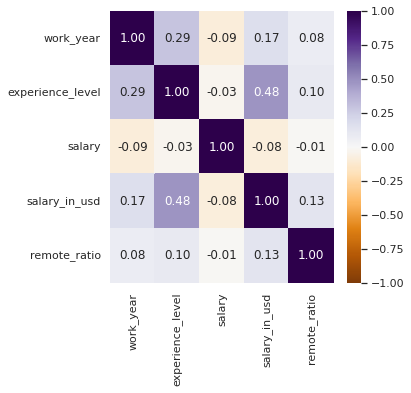

In [ ]:
sns.heatmap(df.corr('pearson'), cmap = 'PuOr', fmt = '.2f', annot = True, vmin = -1, vmax = 1, center = 0);

## Bar Charts

### Frequency Distribution

In [ ]:
for column in cat:
  print(df[column].value_counts())
  print()

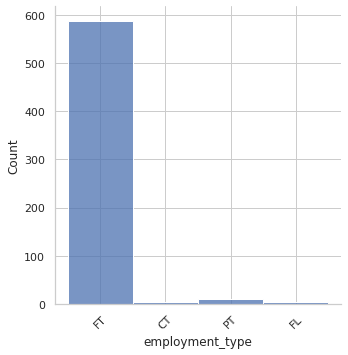

In [ ]:
sns.displot(df, x = 'employment_type');
plt.xticks(rotation = 45);

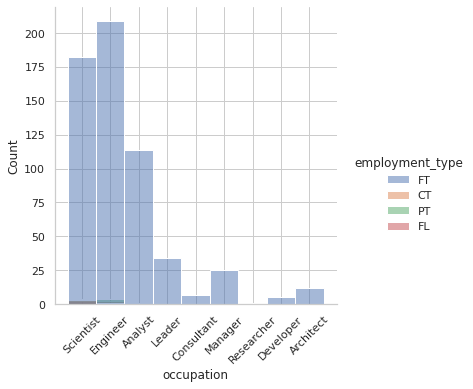

In [ ]:
sns.displot(df, x = 'occupation', hue = 'employment_type');
plt.xticks(rotation = 45);

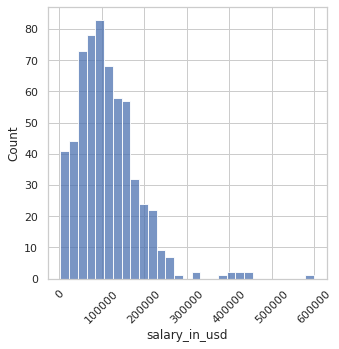

In [ ]:
sns.histplot(df, x = 'salary_in_usd');
plt.xticks(rotation = 45);

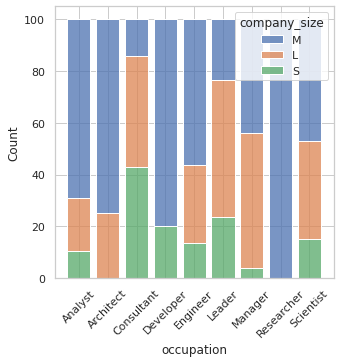

In [ ]:
perc = df.groupby('occupation')['company_size'].value_counts(normalize = True).mul(100).reset_index(name = 'percentage')
sns.histplot(x = 'occupation' , hue = 'company_size', weights = 'percentage', multiple = 'stack', data = perc, shrink = 0.8);
plt.xticks(rotation = 45);

## Boxplot

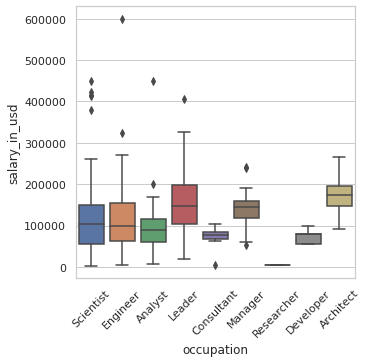

In [ ]:
sns.boxplot(x = df['occupation'], y = df['salary_in_usd']);
plt.xticks(rotation = 45);

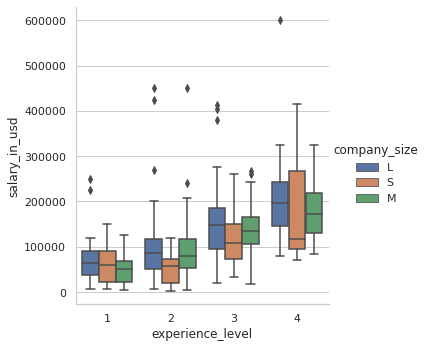

In [ ]:
sns.catplot(data = df,
           x = 'experience_level',
           y = 'salary_in_usd',
           kind = 'box',
           hue = 'company_size');